In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np



In [2]:
rpost1 = 30*Hz
rpost2 = 10*Hz
rpre = 60*Hz
N = 5000
T=3*second

rpost = TimedArray([rpost1,rpost2],dt=T/2)

post = PoissonGroup(N, rates='rpost(t)')
pre  = PoissonGroup(N, rates=rpre)

tis = 10*ms
til = 50*ms
tjs = 15*ms
tjl = 30*ms
Ad = 1
Ap = Ad*tis*tjl/tjs/til

S = Synapses(pre, post,
         '''w : 1
            dois1/dt = -ois1 / tis : 1 (event-driven)
            dois/dt  = (ois1-ois) / tis : 1 (event-driven)
            doil1/dt = -oil1 / til : 1 (event-driven)
            doil/dt  = (oil1-oil) / til : 1 (event-driven)
            dojs1/dt = -ojs1 / tjs : 1 (event-driven)
            dojs/dt  = (ojs1-ojs) / tjs : 1 (event-driven)
            dojl1/dt = -ojl1 / tjl : 1 (event-driven)
            dojl/dt  = (ojl1-ojl) / tjl : 1 (event-driven)
            ''',
         on_pre='''ojs1+=1
                   ojl1+=1
                   ''',
         on_post='''w = w + Ap*ojs1*oil - Ad*ois1*ojl
                    ois1+=1
                    oil1+=1
                    ''',
         )
S.connect(j='i')
w_ori = 0
S.w = w_ori

w_mon = StateMonitor(S, 'w',record=range(N))
post_mon = SpikeMonitor(post)
pre_mon = SpikeMonitor(pre)

run(T)



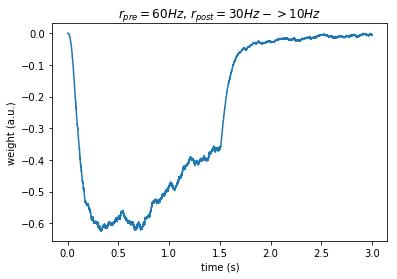

In [3]:
plt.plot(w_mon.t/second,mean(w_mon.w.T,1))
plt.xlabel('time (s)')
plt.ylabel('weight (a.u.)')
plt.title(r'$r_{pre}=%dHz$, $r_{post}=%dHz->%dHz$'%(rpre,rpost1,rpost2))
plt.show()
